# **Value Information(VI)**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## 1. **¿Qué es el Value Information (IV)?**  
El **Value Information (IV)** es una métrica utilizada en análisis de riesgo crediticio para medir la capacidad predictiva de una variable en la separación entre "buenos" (clientes que cumplen con sus pagos) y "malos" (clientes que no cumplen). Se basa en el **Weight of Evidence (WoE)** y permite seleccionar variables relevantes para un modelo de **Credit Scoring**.  

La fórmula del IV es:  

$$
IV = \sum \left( (\% \text{ de buenos en la categoría} - \% \text{ de malos en la categoría}) \times WoE \right)
$$  

## 2. **Interpretación del IV**  
El **IV** proporciona una guía para evaluar la importancia de una variable en el modelo. Se interpreta de la siguiente manera:  

- **IV < 0.02** → No predictiva  
- **0.02 ≤ IV < 0.1** → Predictividad débil  
- **0.1 ≤ IV < 0.3** → Predictividad moderada  
- **0.3 ≤ IV < 0.5** → Predictividad fuerte  
- **IV ≥ 0.5** → Predictividad muy fuerte (posible riesgo de sobreajuste)  

## 3. **Uso del IV en Credit Scoring**  
El IV es ampliamente utilizado en la selección y transformación de variables dentro de modelos de scoring.  

### a) **Selección de Variables**  
   - Se usa el IV para eliminar variables irrelevantes o redundantes.  
   - Solo se mantienen aquellas con un IV significativo.  

### b) **Priorización de Variables**  
   - Variables con IV más alto tienen mayor capacidad predictiva.  
   - Se pueden utilizar técnicas de reducción de dimensiones basadas en IV.  

### c) **Validación del Modelo**  
   - Un IV demasiado alto puede indicar sobreajuste.  
   - Se busca un balance entre predictividad y estabilidad.  

El **IV**, junto con el **WoE**, forma una base sólida para la construcción de modelos robustos de **Credit Scoring**, mejorando la interpretabilidad y desempeño del modelo.

# Paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [ ]:
link = "https://raw.githubusercontent.com/SergioDP94/CreditScoring/refs/heads/main/Data/credit_risk_dataset.csv"
data = pd.read_csv(link)
data.dropna(inplace=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


# Information Value (IV)

## Paso 1: Tabla de frecuencias

In [ ]:
t_freq = data.loan_status.value_counts()
t_freq

,count
loan_status,
0,22435
1,6203


## Paso 2: Crear la tabla cruzada

In [ ]:
t_cross = pd.crosstab(data['loan_grade'],data['loan_status'])
t_cross

loan_status,0,1
loan_grade,,
A,8498,904
B,7698,1453
C,4542,1157
D,1325,1923
E,308,562
F,63,146
G,1,58


## Paso 3: Crear la tabla cruzada relativa

In [ ]:
t_cross_rel = t_cross.div(t_freq, axis=1)
t_cross_rel.columns = ['Bueno','Malo']
t_cross_rel

,Bueno,Malo
loan_grade,,
A,0.378783,0.145736
B,0.343125,0.234241
C,0.202452,0.186523
D,0.059060,0.310011
E,0.013729,0.090601
F,0.002808,0.023537
G,0.000045,0.009350


<Axes: xlabel='loan_grade'>

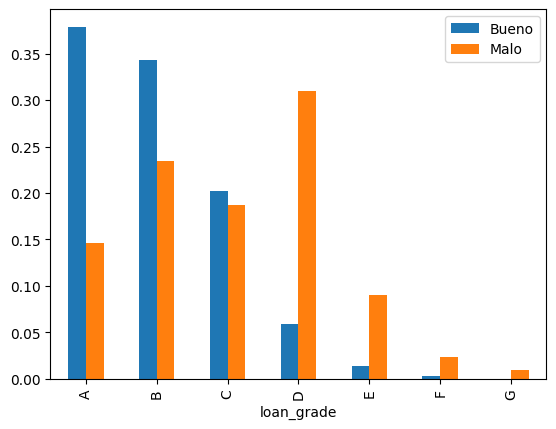

In [ ]:
t_cross_rel.plot(kind='bar')

## Paso 4: Calcular ratio logaritmico

In [ ]:
t_cross_rel['WoE'] = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
t_cross_rel

,Bueno,Malo,WoE
loan_grade,,,
A,0.378783,0.145736,0.955168
B,0.343125,0.234241,0.381741
C,0.202452,0.186523,0.081948
D,0.059060,0.310011,-1.658063
E,0.013729,0.090601,-1.886991
F,0.002808,0.023537,-2.126061
G,0.000045,0.009350,-5.346032


## Paso 5: Calculando el IV

In [ ]:
# Cálculo del componente IV para cada categoría
t_cross_rel['IV_component'] = (t_cross_rel['Bueno'] - t_cross_rel['Malo']) * t_cross_rel['WoE']
t_cross_rel

,Bueno,Malo,WoE,IV_component
loan_grade,,,,
A,0.378783,0.145736,0.955168,0.222599
B,0.343125,0.234241,0.381741,0.041565
C,0.202452,0.186523,0.081948,0.001305
D,0.059060,0.310011,-1.658063,0.416094
E,0.013729,0.090601,-1.886991,0.145058
F,0.002808,0.023537,-2.126061,0.044071
G,0.000045,0.009350,-5.346032,0.049749


In [ ]:
# Sumar los componentes para obtener el IV total
IV = t_cross_rel['IV_component'].sum()

print("El Information Value (IV) total es:", IV)

El Information Value (IV) total es: 0.9204414463262337


<Axes: xlabel='loan_grade'>

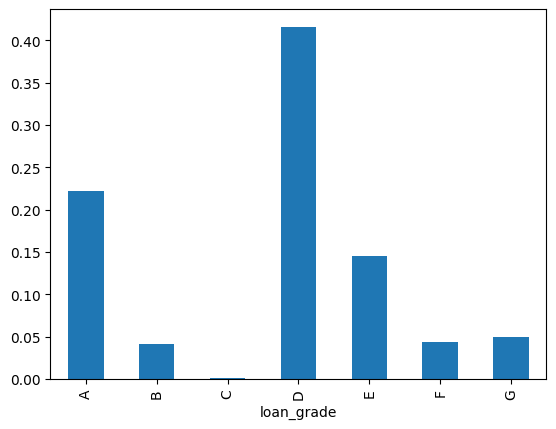

In [ ]:
t_cross_rel['IV_component'].plot(kind='bar')

# Information Value (IV) con variables cuantitativas

## Paso 1: Discretizando variables

In [ ]:
#loan_percent_income

In [ ]:
num_cuantiles = 10
data['loan_percent_income_freq'] = pd.qcut(data['loan_percent_income'], q=num_cuantiles, labels=False)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_freq
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,9
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,9
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,9


## Paso 2: Tabla de frecuencias

In [ ]:
t_freq = data.loan_status.value_counts()
t_freq

,count
loan_status,
0,22435
1,6203


## Paso 3: Crear la tabla cruzada

In [ ]:
t_cross = pd.crosstab(data['loan_percent_income_freq'],data['loan_status'])
t_cross

loan_status,0,1
loan_percent_income_freq,,
0,2743,313
1,3187,451
2,2241,332
3,2082,285
4,3091,478
5,1692,341
6,2792,619
7,2063,494
8,1776,967


## Paso 4: Crear la tabla cruzada relativa

In [ ]:
t_cross_rel = t_cross.div(t_freq, axis=1)
t_cross_rel.columns = ['Bueno','Malo']
t_cross_rel

,Bueno,Malo
loan_percent_income_freq,,
0,0.122264,0.050459
1,0.142055,0.072707
2,0.099889,0.053522
3,0.092801,0.045946
4,0.137776,0.077059
5,0.075418,0.054973
6,0.124448,0.099790
7,0.091955,0.079639
8,0.079162,0.155892


<Axes: xlabel='loan_percent_income_freq'>

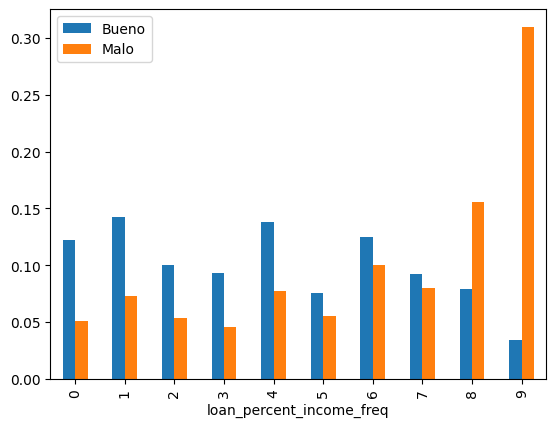

In [ ]:
t_cross_rel.plot(kind='bar')

## Paso 5: Calcular ratio logaritmico

In [ ]:
t_cross_rel['WoE'] = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
t_cross_rel

,Bueno,Malo,WoE
loan_percent_income_freq,,,
0,0.122264,0.050459,0.885015
1,0.142055,0.072707,0.669779
2,0.099889,0.053522,0.623953
3,0.092801,0.045946,0.703006
4,0.137776,0.077059,0.581050
5,0.075418,0.054973,0.316195
6,0.124448,0.099790,0.220819
7,0.091955,0.079639,0.143792
8,0.079162,0.155892,-0.677669


## Paso 6: Aplicando el IV

In [ ]:
# Cálculo del componente IV para cada categoría
t_cross_rel['IV_component'] = (t_cross_rel['Bueno'] - t_cross_rel['Malo']) * t_cross_rel['WoE']

# Sumar los componentes para obtener el IV total
IV = t_cross_rel['IV_component'].sum()

print("El Information Value (IV) total es:", IV)

El Information Value (IV) total es: 0.8804866581178366


# Automatización

## Función

In [ ]:
def get_woe(data,var,number=False):
  if number:
    num_cuantiles = 10
    data[var+'2'] = pd.qcut(data[var], q=num_cuantiles, labels=False, duplicates='drop')
    var = var+'2'
  t_freq = data['loan_status'].value_counts()
  t_cross = pd.crosstab(data[var],data['loan_status'])
  t_cross_rel = t_cross.div(t_freq, axis=1)
  t_cross_rel.columns = ['Bueno','Malo']
  WoE = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
  WoE_dict = WoE.to_dict()
  val_WoE = data[var].map(WoE_dict)
  return val_WoE

In [ ]:
def get_iv(data,var,number=False):
  if number:
    num_cuantiles = 10
    data[var+'2'] = pd.qcut(data[var], q=num_cuantiles, labels=False, duplicates='drop')
    var = var+'2'
  t_freq = data['loan_status'].value_counts()
  t_cross = pd.crosstab(data[var],data['loan_status'])
  t_cross_rel = t_cross.div(t_freq, axis=1)
  t_cross_rel.columns = ['Bueno','Malo']
  t_cross_rel['WoE'] = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
  iv = (t_cross_rel['Bueno'] - t_cross_rel['Malo']) * t_cross_rel['WoE']
  return iv

In [ ]:
data_woe = data[['loan_status']]
data_woe.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


## Verificación

In [ ]:
loan_percent_income_iv = get_iv(data,'loan_percent_income',number=True)
loan_grade_iv = get_iv(data,'loan_grade',number=False)

In [ ]:
loan_percent_income_iv.sum()

0.8804866581178366

In [ ]:
loan_grade_iv.sum()

0.9204414463262337

## Generalización

In [ ]:
data = pd.read_csv(link)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('loan_status')
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [ ]:
textual_columns = data.select_dtypes(include=['object']).columns.tolist()
textual_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
iv_vars = {}

In [ ]:
for var in numerical_columns:
  iv_vars[var] = get_iv(data,var,number=True).sum()

In [ ]:
for var in textual_columns:
  iv_vars[var] = get_iv(data,var,number=False).sum()

In [ ]:
resultados = pd.DataFrame(iv_vars.items(),columns=['var','iv'])
resultados.set_index('var',inplace=True)
resultados

,iv
var,
person_age,0.009656
person_income,0.451078
person_emp_length,0.061703
loan_amnt,0.091797
loan_int_rate,0.755697
loan_percent_income,0.880487
cb_person_cred_hist_length,0.004111
person_home_ownership,0.378353
loan_intent,0.097886


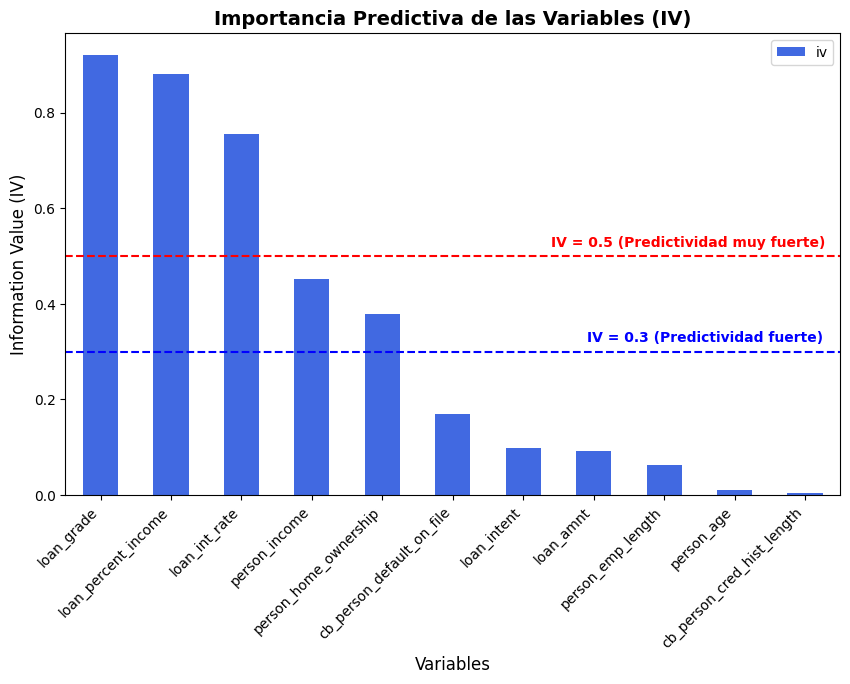

In [ ]:
ax = resultados.sort_values('iv', ascending=False).plot(kind='bar', figsize=(10, 6), color='royalblue')

# Agregar títulos y etiquetas
plt.title('Importancia Predictiva de las Variables (IV)', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Information Value (IV)', fontsize=12)

# Línea horizontal en IV = 0.5 y 0.3
plt.axhline(y=0.5, color='red', linestyle='dashed', linewidth=1.5)
plt.text(x=6.4, y=0.52, s='IV = 0.5 (Predictividad muy fuerte)', color='red', fontsize=10, fontweight='bold')
plt.axhline(y=0.3, color='blue', linestyle='dashed', linewidth=1.5)
plt.text(x=6.9, y=0.32, s='IV = 0.3 (Predictividad fuerte)', color='blue', fontsize=10, fontweight='bold')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar gráfico
plt.show()